In [128]:
import json
import os

import fsspec
import pandas as pd

from marin.utils import fsspec_glob

In [139]:
directory = "gs://marin-us-east5/documents/medu-economics-score-llama-70b/fineweb-test-7bdb3a"

files = fsspec_glob(os.path.join(directory, "**/*.json"))

In [130]:
filenames = []
prompts = []
generated_texts = []

for file in files:
    with fsspec.open(file, "r") as f:
        for line in f:
            content = json.loads(line)
            filenames.append(file)
            prompts.append(content.get("prompt", ""))
            generated_texts.append(content.get("generated_text", ""))

In [131]:
df = pd.DataFrame({
    "file": filenames,
    "prompt": prompts,
    "generated_text": generated_texts
})

df

,file,prompt,generated_text
0,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
1,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
2,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
3,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
4,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
...,...,...,...
945279,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless
945280,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor
945281,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Good
945282,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor


In [132]:
SCORE_OPTIONS = {
    "Great": 5, "Good": 4, "Okay": 3, "Poor": 2, "Useless": 1
}
def get_score(generated_text):
    for option, score in SCORE_OPTIONS.items():
        if option in generated_text:
            return score
    return -1

df['score'] = df['generated_text'].apply(lambda x: get_score(x))

df

,file,prompt,generated_text,score
0,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
1,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
2,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
3,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
4,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
...,...,...,...,...
945279,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
945280,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor,2
945281,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Good,4
945282,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor,2


In [133]:
df = df[df['score'] != -1]
df

,file,prompt,generated_text,score
0,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
1,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
2,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
3,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
4,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
...,...,...,...,...
945279,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Useless,1
945280,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor,2
945281,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Good,4
945282,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Poor,2


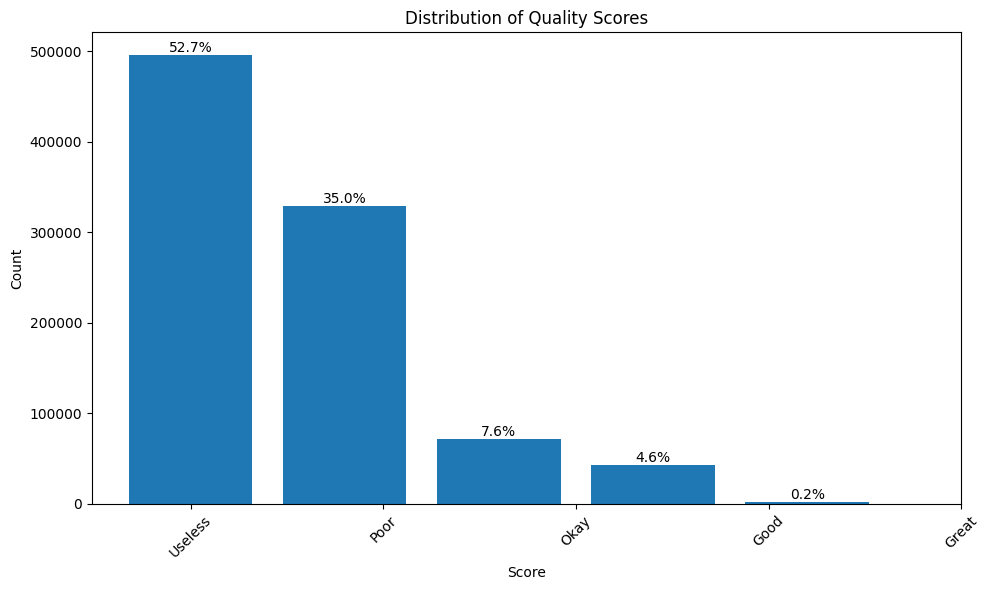

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(df['score'], bins=len(SCORE_OPTIONS), align='left', rwidth=0.8)

# Calculate and display percentages
total = len(df)
for i, count in enumerate(counts):
    percentage = (count/total) * 100
    plt.text(bins[i], count, f'{percentage:.1f}%',
             ha='center', va='bottom')

plt.xticks(list(SCORE_OPTIONS.values()), list(SCORE_OPTIONS.keys()), rotation=45)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Quality Scores')
plt.tight_layout()
plt.show()


In [137]:
great_subset = df[df['score'] == 5]
great_subset

,file,prompt,generated_text,score
667,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5
1406,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5
2844,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5
3925,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5
4150,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5
...,...,...,...,...
940699,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5
941295,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5
943611,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5
943938,gs://marin-us-east5/documents/medu-economics-s...,<|begin_of_text|><|start_header_id|>system<|en...,Great,5


In [138]:
from IPython.display import Markdown

display(Markdown(great_subset['prompt'].iloc[150]))

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

The following document is being considered as training data for a
        Large Language Model.
        Provide a concise description of the document and an assessment of
        the quality of the text or code in the document.
        Key Attributes to Mention
        - Languages contained in the document
        - The coherence of the document
        - The skills the document demonstrates
        - The topics the document contains facts and information about
        Document:
        '''
        Siding Market Size, Growth, Forecast Till 2030

COVID -19 Effect Considered

Global Siding Market Size was USD 87.30 Billion in 2022, this report covers Market growth, trend, opportunity and forecast 2023-2030

The Siding Market is expected to grow from USD 87.30 Billion in 2022 to USD 102.30 Billion by 2030, at a CAGR of 2.30% during the forecast period.

The global siding market is projected to experience significant growth in the coming years, primarily driven by the rise in residential and commercial construction activities. Siding products are widely used for enhancing the aesthetic appeal and durability of buildings. The market is segmented based on product type, material, application, and geography. The vinyl siding segment holds the largest market share due to its durability, low maintenance, and cost-effectiveness. The Asia Pacific region is expected to witness the highest growth due to the increasing demand for siding products in emerging economies like China and India. The global siding market size is estimated to reach USD 102.30 billion by 2030.

The objective of report is to define, segment, and project the market on the basis of product type, application, and region, and to describe the content about the factors influencing market dynamics, policy, economic, technology and market entry etc.

Siding refers to the outer covering or cladding of any building, which is installed to protect the structure from weather elements. The global siding market research report segments the market on the basis of type, application, region, and major market players. The types of siding covered under this report include wood siding, metal siding, plastic siding, composite siding, stone siding, and others. The applications of siding are categorized as infrastructure projects, residential buildings, commercial buildings, industrial constructions, and others. The geographical regions covered in this report include North America, Asia Pacific, Middle East, Africa, Australia, and Europe. The major market players profiled in the report are Alumasc, Boral, Knauf, Kingspan Panels, James Hardie Industries, Tata BlueScope Steel, Designer Panel Systems, Lakesmere Group, Nichiha, MBCI, Metalcraft Roofing, Weathertex, Peter L Brown, Ruukki Construction, and more. The report also provides information about the regulatory and legal factors that impact the siding market's growth, specific to market conditions. Overall, it is a comprehensive report that guides investors and other stakeholders to make informed decisions regarding the siding market.

MARKET OVERVIEW

The Siding market is expected to grow from USD 89.30 Billion in 2023 to USD 102.30 Billion by 2030, at a CAGR of 2.30% during the forecast period.
Siding Market Overview
Source: Secondary Information and Report Prime Research Team; 2023

Report Scope

Below table covers some details about the current and projected market size details.

Report Attribute Details
Market Size in 2022 87.30 Billion
Projected Market Size in 2023 89.30 Billion
Projected Market Size in 2030 102.30 Billion
CAGR Growth Rate 2.30% CAGR
Base Year 2022
Forecast Years 2023 - 2030
Key Market Players Alumasc, Boral, James Hardie Industries, Kingspan Panels, Knauf, Asahi Tostem Exterior Building Materials, Tata BlueScope Steel, Designer Panel Systems, Everite Building Products, Etex Group, Lakesmere Group, MBCI, Metalcraft Roofing, National Cladding, Nichiha, Wall Construction, Weathertex, Peter L Brown, Palagio Engineering, Revelstone, Sound Homes, Rockwool International, Ruukki Construction, Shanghai Seventrust Industry, Shenzhen Weigeya Technology
Key Segment By Type Wood Siding, Plastic Siding, Metal Siding, Composite Siding, Stone Siding, Other
Key Segment By Applications Infrastructure, Residential Building, Commercial Building, Industrial Building, Other
Major Regions Covered North America, Europe, Asia Pacific, Latin America, and the Middle East & Africa
Purchase Options Report Customization Available. Explore purchase options

MARKET Segmentation

The siding market is a mature market with a diverse target audience. The primary target market is the residential construction market, including homeowners and builders. The siding industry has seen steady growth over the years, driven by several factors such as the rising demand for durable and low-maintenance exterior cladding solutions, advancements in material technology, and the increasing trend towards energy-efficient homes. Additionally, stringent building codes and regulations, especially in developed regions, is also a key revenue driver for the siding market.

One of the latest trends in the siding market is the growing popularity of fiber cement siding due to its durability, low-maintenance, and design options. Composite siding materials such as vinyl and polymer are also gaining traction among consumers. Another trend is the strong demand for eco-friendly and sustainable exterior cladding options, especially among homeowners who prioritize environmental conservation and energy efficiency.

However, the siding market also faces some significant challenges, such as fluctuating raw material prices, increasing competition from alternative cladding products, and the limited availability of skilled labor, which can significantly impact the cost of installation. The outbreak of COVID-19 has also hampered the growth of the global building industry, which has negatively affected the demand for siding products.

The global siding market is projected to grow steadily over the forecast period, driven by the robust growth in the construction industry, especially in developing economies. North America and Europe are currently the dominant regions in the market, owing to their stringent building codes and high levels of disposable income. The report also recommends that siding manufacturers focus on developing eco-friendly and sustainable siding products and adopting more efficient manufacturing processes to remain competitive in the market. Cost-effective and innovative marketing strategies are also recommended to increase brand awareness and customer loyalty.

This report covers impact on COVID-19 and Russia-Ukraine wars in detail.

Key Product Application Covered

  • Infrastructure
  • Residential Building
  • Commercial Building
  • Industrial Building
  • Other

Key Product Types Covered

  • Wood Siding
  • Plastic Siding
  • Metal Siding
  • Composite Siding
  • Stone Siding
  • Other

Key Companies Covered

  • Alumasc
  • Boral
  • James Hardie Industries
  • Kingspan Panels
  • Knauf

MARKET BY REGION

The siding market has experienced significant growth across various regions such as North America, Asia Pacific, Europe, USA, and China. North America leads the global market due to the increasing demand for residential and commercial construction activities, followed by Europe. The rise in population and urbanization in the Asia Pacific region has led to an increase in housing construction activities, which is expected to fuel the market growth in this region. China has emerged as a major contributor to the siding market due to the growth of the construction industry. The increasing demand for green and energy-efficient construction materials is also propelling the growth of the siding market globally.

 North America is expected to dominate the Siding market, followed by Europe and the Asia Pacific region. The North American region's dominance can be attributed to various factors such as the presence of large-scale construction activities, increasing awareness about energy-efficient materials, and technological advancements in the siding industry.

As per market share percent valuation, North America is expected to hold the largest market share of about 35%, followed by Europe with a share of approximately 30%. The Asia Pacific region is anticipated to witness significant growth in the siding market, primarily due to increasing urbanization and rising construction activities in countries such as China, India, and Japan. The market share of the siding market in the Asia Pacific region is expected to reach around 25%.

Furthermore, the Middle East and Africa and Latin America regions are also expected to witness substantial growth in the siding market, but their market share percent valuations are likely to remain comparatively lower than that of the aforementioned regions. Overall, the global siding market is expected to witness a steady growth rate during the forecast period, with North America and Europe dominating the market share.

Our report covers multiple other countries apart from the one mentioned here. We can also add more countries or we can be specific to one country based on your specific requirements. The report covers the competitive and regional landscape. Also, talks about the macro and micro economic factors.

Source: Secondary Information and Report Prime Research Team; 2023
Market Share By Company
Source: Secondary Information and Report Mines Research Team; 2022

MARKET BY COMPANY

The global siding market is highly competitive with the presence of numerous players operating in the market. The leading players in the siding market include Alumasc, Boral, James Hardie Industries, Kingspan Panels, Knauf, Asahi Tostem Exterior Building Materials, Tata BlueScope Steel, Designer Panel Systems, Everite Building Products, Etex Group, Lakesmere Group, MBCI, Metalcraft Roofing, National Cladding, Nichiha, Wall Construction, Weathertex, Peter L Brown, Palagio Engineering, Revelstone, Sound Homes, Rockwool International, Ruukki Construction, Shanghai Seventrust Industry, Shenzhen Weigeya Technology, among others.

These companies provide a range of siding products that cater to the construction and building industry. The siding market is primarily driven by the increasing demand for energy-efficient and sustainable homes, offices, and commercial spaces. These companies are investing in research and development activities to offer innovative products and solutions to their customers.

The leading companies in the siding market, such as James Hardie Industries, Kingspan Panels, and Nichiha, primarily focus on offering high-quality fiber cement siding products that are durable, fire-resistant, and require low maintenance. These companies have a strong presence in North America, Europe, and Asia-Pacific regions.

In contrast, companies like Weathertex, Designer Panel Systems, and Everite Building Products offer innovative and sustainable siding solutions. Weathertex manufactures timber-based siding products that are environment-friendly and comply with various sustainability standards. Designer Panel Systems offers lightweight and eco-friendly siding panels made of polyurethane foam. Everite Building Products provides fiber-cement-based siding solutions.

The sales revenue figures of a few of the above-listed companies for the year 2020 are as follows:

- James Hardie Industries - $2.95 billion

- Nichiha - $580 million

- Kingspan Panels - $1.80 billion

- Knauf - $7.18 billion

- Tata BlueScope Steel - $2.90 billion

Overall, the siding market is expected to witness substantial growth due to increasing construction activities and the demand for sustainable and energy-efficient homes and buildings. The leading players in the market are likely to benefit from this growth trend by offering innovative and high-quality siding solutions.

Our report covers multiple other companies apart from the one mentioned here. We can also add more companies based on your specific requirements. The report covers the competitive landscape along with their market size, revenue, growth rate, potential and other key parameters.

Key Companies Covered
  • Alumasc
  • Boral
  • James Hardie Industries
  • Kingspan Panels
  • Knauf
Market Share By Type
Source: Secondary Information and Report Mines Research Team; 2022

MARKET BY TYPE

Siding is an essential component in constructing a building. There are several types of siding available in the market that builders can use based on preferences, budget, and compatibility with the environment. Wood siding is the most common siding option because it is traditional and durable. Plastic siding is gaining popularity in recent years as it is not only affordable but also resistant to weather, easy to maintain, and comes in various colors. Metal siding is popular among the industrial sector as it offers a modern and sleek look to buildings. Composite siding is an excellent choice for those who want a low-maintenance option that lasts longer than other types. Stone siding offers a luxurious and high-end look to buildings, and it is long-lasting. Other siding options include stucco, brick, and cement board.

These siding types help boost the demand for the overall siding market in various ways. For instance, wood siding is available in several styles, making it an attractive option for people looking for a traditional aesthetic. Plastic siding's low cost and easy maintenance make it an attractive option for homeowners. Metal siding is popular due to its exceptional durability and resistance to weather. Composite siding is an innovative product that is low maintenance and lasts longer than other siding types. Lastly, stone siding is an attractive option for people looking for a premium look, and it offers a high return on investment. All these factors contribute to the soaring demand for siding solutions in the market.

Key Product Types
  • Wood Siding
  • Plastic Siding
  • Metal Siding
  • Composite Siding
  • Stone Siding
  • Other
Market Share By Application
Source: Secondary Information and Report Mines Research Team - 2022

MARKET BY APPLICATIONS

Siding is applied to different types of structures, including infrastructure, residential, commercial, industrial, and other buildings. For infrastructure, siding is used on bridges and tunnels to protect them against the elements. In residential buildings, siding is used to improve their appearance and protect the interior from weather damage. It is also used on commercial buildings for the same reasons. In industrial buildings, siding is used for insulation and to protect the building's interior from chemicals.

The fastest-growing application segment in terms of revenue is residential buildings, as more individuals are investing in renovations and new homes. Additionally, there is an increase in energy-efficient siding options, which provide cost savings on energy bills. Commercial buildings are also seeing growth as businesses look to update their exteriors for a modern appearance. Overall, siding plays a vital role in protecting and enhancing the appearance of various types of buildings.

Key Application Types
  • Infrastructure
  • Residential Building
  • Commercial Building
  • Industrial Building
  • Other

Table of Contents

  1. Scope of the Report
    • 1.1Market Introduction
    • 1.2Years Considered
    • 1.3Research Objectives
    • 1.4Market Research Methodology
    • 1.5Research Process and Data Source
    • 1.6Economic Indicators
    • 1.7Currency Considered
  2. Executive Summary
    • 2.1World Market Overview
      • 2.1.1Global Siding Annual Sales 2017-2028
      • 2.1.2World Current & Future Analysis for Siding by Geographic Region, 2017, 2022 & 2030
      • 2.1.3World Current & Future Analysis for Siding by Country/Region, 2017, 2022 & 2030
    • 2.2Siding Segment by Type
      • 2.2.0Wood Siding
      • 2.2.1Plastic Siding
      • 2.2.2Metal Siding
      • 2.2.3Composite Siding
      • 2.2.4Stone Siding
      • 2.2.5Other
    • 2.3Siding Sales by Type
      • 2.3.1Global Siding Sales Market Share by Type (2017-2022)
      • 2.3.2Global Siding Revenue and Market Share by Type (2017-2022)
      • 2.3.3Global Siding Sale Price by Type (2017-2022)
    • 2.4Siding Segment by Application
      • 2.4.0Infrastructure
      • 2.4.1Residential Building
      • 2.4.2Commercial Building
      • 2.4.3Industrial Building
      • 2.4.4Other
    • 2.5Siding Sales by Application
      • 2.5.1Global Siding Sale Market Share by Application (2017-2022)
      • 2.5.2Global Siding Revenue and Market Share by Application (2017-2022)
      • 2.5.3Global Siding Sale Price by Application (2017-2022)

EXPERT ADVICE

The market forecast for siding indicates a positive outlook, with a steady increase in demand. The construction industry's growth, particularly in residential and commercial sectors, will be a key driver for the siding market. Additionally, the focus on sustainable construction practices and the adoption of advanced materials will further fuel the market's expansion. With the rise in disposable income and changing lifestyles, consumers are increasingly seeking attractive and durable siding options, contributing to the market's growth potential.

In terms of latest market trends, there is a growing preference for low-maintenance siding materials such as vinyl and fiber cement. These materials offer durability, weather resistance, and a wide range of design options, catering to the evolving consumer demands. Another emerging trend is the incorporation of technology in siding, with the integration of smart features such as solar panels and energy-efficient coatings. These advancements not only enhance the performance of siding but also align with the global push for sustainable construction practices.

The siding industry has experienced substantial sales and revenue growth in recent years. With the increasing adoption of siding materials across residential, commercial, and industrial sectors, the market has witnessed a surge in demand. The market size for siding is expected to reach a significant value in the coming years, driven by the continuous construction activities and renovation projects worldwide. The siding market share is distributed among various key players, including manufacturers and suppliers, who compete based on product quality, pricing, and innovation.

The siding market's value and worth are influenced by several factors, including the overall economic conditions, construction industry growth, and technological advancements. As the demand for sustainable and aesthetically pleasing building materials continues to rise, the siding market is expected to maintain its worth and expand further. The market's worth is not only measured in monetary terms but also in its contribution to the construction industry's development, environmental sustainability, and overall societal well-being.

In conclusion, the siding business is a thriving sector within the construction industry, driven by factors such as increasing construction activities, urbanization, and the demand for energy-efficient and attractive building materials. The industry's future growth looks promising, with a positive market forecast and emerging trends that cater to evolving consumer preferences. The sales and revenue in the siding market have been on the rise, and the market's size, share, value, and worth are indicative of its importance within the broader construction landscape. Competition among companies in the siding market is fierce, with key players vying for market dominance through product innovation, quality, and competitive pricing. Overall, the siding industry presents lucrative opportunities for businesses and contributes to the growth and development of the construction sector analyzed the siding market, including specific segments such as the fiber cement siding market and the vinyl siding market. These segments play a crucial role in shaping the overall siding market landscape. The siding market share is distributed among different materials, with vinyl siding and fiber cement siding being key players.

The fiber cement siding market is experiencing significant growth due to its durability, low maintenance requirements, and resistance to fire, insects, and rot. This market segment is expected to witness continued expansion as consumers seek long-lasting and cost-effective siding solutions for their homes and commercial buildings.

Vinyl siding, on the other hand, holds a prominent position in the siding market. Its popularity can be attributed to its affordability, versatility in design options, and low maintenance. The vinyl siding market has witnessed steady growth as it meets the demands of budget-conscious consumers while providing an attractive and durable exterior for buildings.

Understanding the siding market and its various segments is crucial for industry professionals, investors, and stakeholders. This report provides valuable insights into market trends, sales, and revenue figures, market size, and competition among key players. It enables businesses to identify growth opportunities, make informed decisions, and develop effective marketing and sales strategies.

here are five key questions related to the siding market:

  1. What are the latest trends in the siding market?

  2. How is the vinyl siding market performing compared to other siding materials?

  3. What is the market share of fiber cement siding in the overall siding market?

  4. What is the forecasted growth rate of the siding market in the next five years?

  5. Who are the major players in the siding industry and what is their competitive positioning?

By addressing these key questions, businesses and individuals can gain a better understanding of the siding market dynamics, assess market opportunities, and stay ahead in a competitive landscape.

In conclusion, this report on the siding market provides a comprehensive analysis of the industry, including insights into the fiber cement siding market, vinyl siding market, market share, and key trends. It equips the audience with valuable information to make informed decisions, capitalize on market opportunities, and stay competitive in the evolving siding industry. Whether you are a business owner, investor, or industry professional, understanding the siding market landscape is crucial for success in this dynamic sector.

Frequently Asked Questions (FAQs)

Siding market size was USD 87.30 Billion in 2022.

Siding market will grow at CAGR of 2.30% from 2023 to 2030.

Companies like Alumasc , Boral , James Hardie Industries , Kingspan Panels , Knauf , Asahi Tostem Exterior Building Materials , Tata BlueScope Steel , Designer Panel Systems , Everite Building Products , Etex Group , Lakesmere Group , MBCI , Metalcraft Roofing , National Cladding , Nichiha , Wall Construction , Weathertex , Peter L Brown , Palagio Engineering , Revelstone , Sound Homes , Rockwool International , Ruukki Construction , Shanghai Seventrust Industry , Shenzhen Weigeya Technology are driving the majority of market globally.

Siding market size is expected to be USD 102.30 Billion in 2030.
Choose Licence
Single User License

Only one user can use this report

Multi User License

Additional users can access this report

Enterprise License

You can share within your company

3590
$4590
SPECIAL DISCOUNT of 10%

For Single Licence

Siding Market
PDF
This FREE sample includes market data points, ranging from trend analyses to market estimates & forecasts. See for yourself.

Our Clients

Testimonials

"Excellent customer service by aniket and their team. Was on very tight scheduled and the team delivered it in like 12 hours. Deal closed."

Sergio Rossi

Managing Director & Partner

"Accurate data points that our customer need to understand their next target market. Pretty graph and very important minute details. Thank you."

William Bruggemeier

Product Development Leader

Included in the Report

Table of Contents
Global Coverage
Competition Revenue and Sales
PDF and Excel Format

RELATED REPORTS

COVID -19 Effect Considered
Avocado Market
No. of Pages: 168 Published at:21-May Price: $3590

The Avocado market is expected to grow from 539.22 Million in 2023 to 733.80 Million by 2030, at a CAGR of 4.50% during the forecast period. Read More on Avocado Market

COVID -19 Effect Considered
Vermicompost Market
No. of Pages: 179 Published at:23-May Price: $3590

The Vermicompost market is expected to grow from 103.70 Billion in 2023 to 238.70 Billion by 2030, at a CAGR of 14.90% during the forecast period. Read More on Vermicompost Market

COVID -19 Effect Considered
Market Simulation Software Market
No. of Pages: 169 Published at:23-Nov Price: $3590

The Market Simulation Software market is expected to grow from 0.95 Billion in 2023 to 1.43 Billion by 2030, at a CAGR of 6.00% during the forecast period. Read More on Market Simulation Software Market

COVID -19 Effect Considered
Hotel Market Intelligence Software Market
No. of Pages: 188 Published at:04-Dec Price: $3590

The Hotel Market Intelligence Software market is expected to grow from 3.15 Billion in 2023 to 4.43 Billion by 2030, at a CAGR of 5.00% during the forecast period. Read More on Hotel Market Intelligence Software Market
        '''
        Based on your previous reasoning, give me a concrete decision
        about the utility of the document as training data for the
        following benchmark.
        
## Test Type
This test appears to be a comprehensive assessment of economic knowledge, covering microeconomic and macroeconomic concepts, as well as statistical analysis and modeling, likely from an advanced academic or professional setting, such as a college-level economics course or a certification exam for economists.

## Required Languages, Skills, and Knowledge
The language model would need to understand economic terminology, concepts, and theories, including market structures, government intervention, and industry characteristics. It should possess strong problem-solving skills, with the ability to apply economic and statistical concepts to real-world scenarios, and be proficient in English, including grammar, syntax, and vocabulary related to economics and statistics. Additionally, it should be familiar with statistical analysis, including regression, hypothesis testing, and time series modeling.

## Ideal Training Data
The ideal training data for this evaluation would consist of a diverse and comprehensive corpus of texts, including economics and statistics textbooks, academic articles, research papers, practice problems, exams, and study guides. It should also include news articles, online resources, and policy documents discussing economic issues and trends, as well as diverse data sets, such as economic indicators, financial data, and statistical models, to help the model generalize its knowledge and apply it to different scenarios.

        Output your decision about the utility of the data as one of the
        following single words Great/Good/Okay/Poor/Useless without
        formatting.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

